# Analiza Numeryczna (M)
## Pracownia 1 - Zadanie P1.2

Karolina Jeziorska

In [106]:
using PyPlot

### Funkcje liczące sumy

Algorytm sumowania składników w normalnej i odwrotnej kolejności (aprecyzja zależy od przekazanego argumentu)

In [107]:
function normal_sum(b, e, f,typ::Type)
    step = b < e ? 1 : -1
    s::typ = 0
    for i = b:step:e
        s += typ(f(typ(i)))
    end
    return s
end

normal_sum (generic function with 1 method)

Algorytm sumacyjny Kahana składników w normalnej i odwrotnej kolejności w pojedynczej precyzji

In [108]:
function Kahan_sum(b, e, f, typ::Type)
    s::typ = f(b)
    c::typ = 0
    for i = (b+1):e
        y::typ = c + typ(f(typ(i)))
        t::typ = s + y
        c = (s - t) + y
        s = t
    end
    return s
end

Kahan_sum (generic function with 1 method)

Wzory na składniki sumy

In [109]:
g1(k) = k^(-2) 
g2(k) = (-1)*(k^(-2)) + 1
g3(k) = ((-1)^k)*(k^(-2))
g4(k) = (-1)*(k^(-2))

g4 (generic function with 1 method)

### Dokładny wynik - wartość sumy obliczona algorytmem Kahan'a w prezyzji 128 bitowej

In [110]:
setprecision(128)

#wyniki obliczeń sa przechowywane w tablicach, tablica results opisuje wyniki trzymane w tablicach results_g
results = ["wynik dokładny", 
    "suma normalna 32", 
    "suma normalna 64", 
    "suma odwrócona 32", 
    "suma odwrócona 64", 
    "algorytm Kahan'a 32", 
    "algorytm Kahan'a 64"]

7-element Array{String,1}:
 "wynik dokładny"     
 "suma normalna 32"   
 "suma normalna 64"   
 "suma odwrócona 32"  
 "suma odwrócona 64"  
 "algorytm Kahan'a 32"
 "algorytm Kahan'a 64"

### Wartości sumy liczone po kolei różnymi funkcjami w różnych precyzjach

Dla sumy $\sum_{k=1}^{10000} k^{-2}$

In [111]:
results_g1 = Number[]
push!(results_g1, Kahan_sum(1,10000,g1,BigFloat))
#Zwykła suma w naturalnej kolejności
push!(results_g1, normal_sum(1,10000,g1,Float32))
push!(results_g1, normal_sum(1,10000,g1,Float64))

#Zwykła suma w odwrotnej kolejności
push!(results_g1, normal_sum(10000,1,g1,Float32))
push!(results_g1, normal_sum(10000,1,g1,Float64))

#Suma obliczona za pomoca algorytmu sumowania z poprawkami
push!(results_g1, Kahan_sum(1,10000,g1,Float32))
push!(results_g1, Kahan_sum(1,10000,g1,Float64))


7-element Array{Number,1}:
 1.644834071848059769806081833310310903536
 1.6447253f0                              
 1.6448340718480652                       
 1.644834f0                               
 1.6448340718480596                       
 1.644834f0                               
 1.6448340718480599                       

Dla sumy $\sum_{k=1}^{10000} (-1) \cdot k^{-2}$ + 1

In [112]:
results_g2 = Number[]
push!(results_g2, Kahan_sum(1,10000,g2,BigFloat))
#Zwykła suma w naturalnej kolejności
push!(results_g2, normal_sum(1,10000,g2,Float32))
push!(results_g2, normal_sum(1,10000,g2,Float64))

#Zwykła suma w odwrotnej kolejności
push!(results_g2, normal_sum(10000,1,g2,Float32))
push!(results_g2, normal_sum(10000,1,g2,Float64))

#Suma obliczona za pomoca algorytmu sumowania z poprawkami
push!(results_g2, Kahan_sum(1,10000,g2,Float32))
push!(results_g2, Kahan_sum(1,10000,g2,Float64))

7-element Array{Number,1}:
 9998.35516592815194023019391816668968908
 9998.359f0                              
 9998.355165928158                       
 9998.373f0                              
 9998.355165928226                       
 9998.355f0                              
 9998.355165928151                       

Dla sumy $\sum_{k=1}^{10000} (-1)^{k} \cdot k^{-2}$

In [113]:
results_g3 = Number[]
push!(results_g3, Kahan_sum(1,10000,g3,BigFloat))
#Zwykła suma w naturalnej kolejności
push!(results_g3, normal_sum(1,10000,g3,Float32))
push!(results_g3, normal_sum(1,10000,g3,Float64))

#Zwykła suma w odwrotnej kolejności
push!(results_g3, normal_sum(10000,1,g3,Float32))
push!(results_g3, normal_sum(10000,1,g3,Float64))

#Suma obliczona za pomoca algorytmu sumowania z poprawkami
push!(results_g3, Kahan_sum(1,10000,g3,Float32))
push!(results_g3, Kahan_sum(1,10000,g3,Float64))

7-element Array{Number,1}:
 -0.8224670284246132182312075834730125861094
 -0.8224671f0                               
 -0.8224670284246056                        
 -0.822467f0                                
 -0.8224670284246132                        
 -0.822467f0                                
 -0.8224670284246132                        

Dla sumy $\sum_{k=1}^{10000} (-1) \cdot k^{-2}$

In [114]:
results_g4 = Number[]
push!(results_g4, Kahan_sum(1,10000,g4,BigFloat))
#Zwykła suma w naturalnej kolejności
push!(results_g4, normal_sum(1,10000,g4,Float32))
push!(results_g4, normal_sum(1,10000,g4,Float64))

#Zwykła suma w odwrotnej kolejności
push!(results_g4, normal_sum(10000,1,g4,Float32))
push!(results_g4, normal_sum(10000,1,g4,Float64))

#Suma obliczona za pomoca algorytmu sumowania z poprawkami
push!(results_g4, Kahan_sum(1,10000,g4,Float32))
push!(results_g4, Kahan_sum(1,10000,g4,Float64))

7-element Array{Number,1}:
 -1.644834071848059769806081833310310903536
 -1.6447253f0                              
 -1.6448340718480652                       
 -1.644834f0                               
 -1.6448340718480596                       
 -1.644834f0                               
 -1.6448340718480599                       

### Funkcje pomocnicze do sprawdzania dokładności wyniku

In [115]:
function absolute_error(exact_res, res)
    return abs(exact_res - res)
end

function relative_error(exact_res, res)
    return absolute_error(exact_res, res)/abs(exact_res)
end

function exact_number(exact_res, res)
    return -log(10,relative_error(exact_res, res))
end

exact_number (generic function with 1 method)

In [116]:
exact_num_g1 = Float64[]
exact_num_g2 = Float64[]
exact_num_g3 = Float64[]
exact_num_g4 = Float64[]
for i in 2:7
    push!(exact_num_g1, exact_number(results_g1[1], results_g1[i]))
    push!(exact_num_g2, exact_number(results_g2[1], results_g2[i]))
    push!(exact_num_g3, exact_number(results_g3[1], results_g3[i]))
    push!(exact_num_g4, exact_number(results_g4[1], results_g4[i]))
end


Wykres ilości cyfr dokładnych dla sumy $\sum_{k=1}^{10000} k^{-2}$

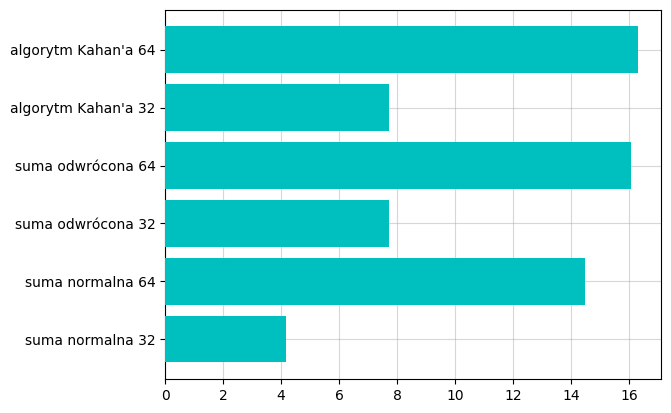

In [117]:
barh(results[2:7], exact_num_g1,color = "c",zorder = 3)
grid(zorder=0, alpha = 0.5)

Wykres ilości cyfr dokładnych dla sumy $\sum_{k=1}^{10000} (-1) \cdot k^{-2}$

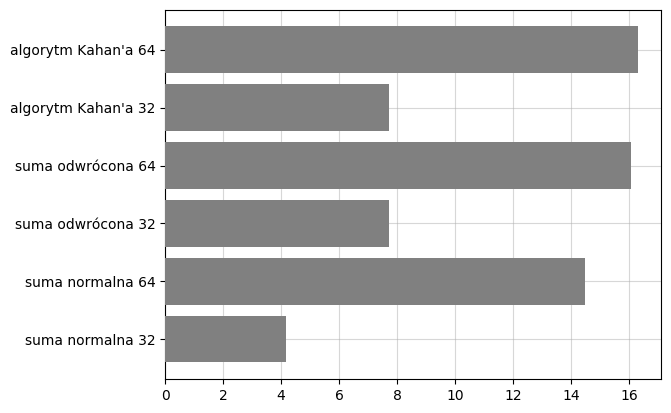

In [118]:
barh(results[2:7], exact_num_g4,zorder = 3, color = "gray")
grid(zorder=0, alpha = 0.5)

Wykres ilości cyfr dokładnych dla sumy $\sum_{k=1}^{10000} (-1) \cdot k^{-2}$ + 1

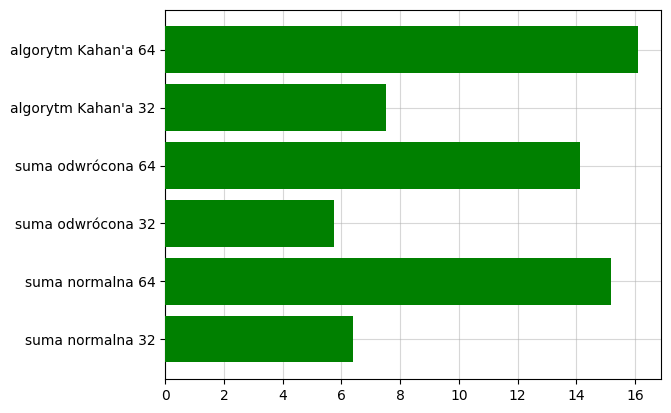

In [119]:
barh(results[2:7], exact_num_g2,color = "green",zorder = 3)
grid(zorder=0, alpha = 0.5)

Wykres ilości cyfr dokładnych dla sumy $\sum_{k=1}^{10000} (-1)^k \cdot k^{-2}$

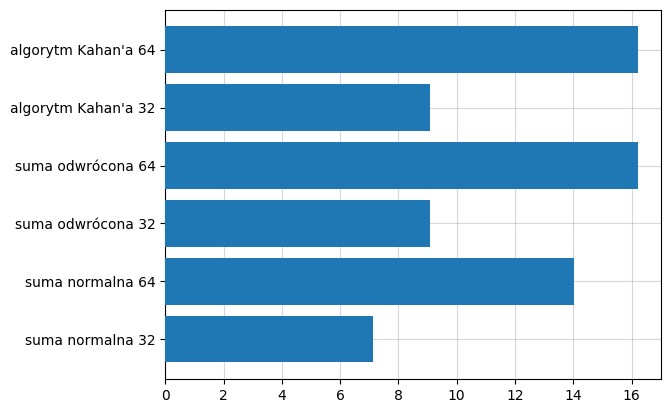

In [120]:
barh(results[2:7], exact_num_g3,zorder = 3)
grid(zorder=0, alpha = 0.5)